In [181]:
import pandas as pd
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns
import os

## Part 1: knowing how this DF was strutured 

In [182]:
FILEFOLDER = os.path.abspath("decision_science_dataset.csv")
df = pd.read_csv(FILEFOLDER).copy()
full_df = df

In [183]:
# Show how this DF was strutured
print(df.shape)
df.info()

(4709, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tag1       4709 non-null   float64
 1   tag2       4709 non-null   float64
 2   tag3       4709 non-null   float64
 3   tag4       4709 non-null   float64
 4   tag5       4709 non-null   float64
 5   tag6       4709 non-null   float64
 6   tag7       4709 non-null   float64
 7   tag8       4709 non-null   float64
 8   tag9_resp  4709 non-null   float64
dtypes: float64(9)
memory usage: 331.2 KB


In [184]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9_resp
count,4709.00000,4709.00000,4709.00000,4709.00000,4709.00000,4709.00000,4709.00000,4709.00000,4709.00000
mean,0.00000,-0.00000,-0.00000,-0.00000,0.12680,0.07136,0.16629,-0.08556,-0.00000
std,1.00011,1.00011,1.00011,1.00011,0.69163,0.70760,0.66088,0.72696,1.00011
min,-1.63556,-7.03781,-1.55994,-2.73873,-1.00000,-1.00000,-1.00000,-1.00000,-2.01734
25%,-0.86153,-0.39768,-0.51768,-0.00020,-0.51971,-0.62277,-0.41406,-0.82236,-0.77384
50%,-0.01286,0.56868,0.07634,-0.00020,0.25096,0.10206,0.25415,-0.17769,-0.24241
75%,0.78926,0.60238,0.34298,-0.00020,0.79467,0.79766,0.80547,0.64177,0.62672
max,2.20686,0.92032,55.00408,4.79221,1.00000,1.00000,1.00000,1.00000,5.81735


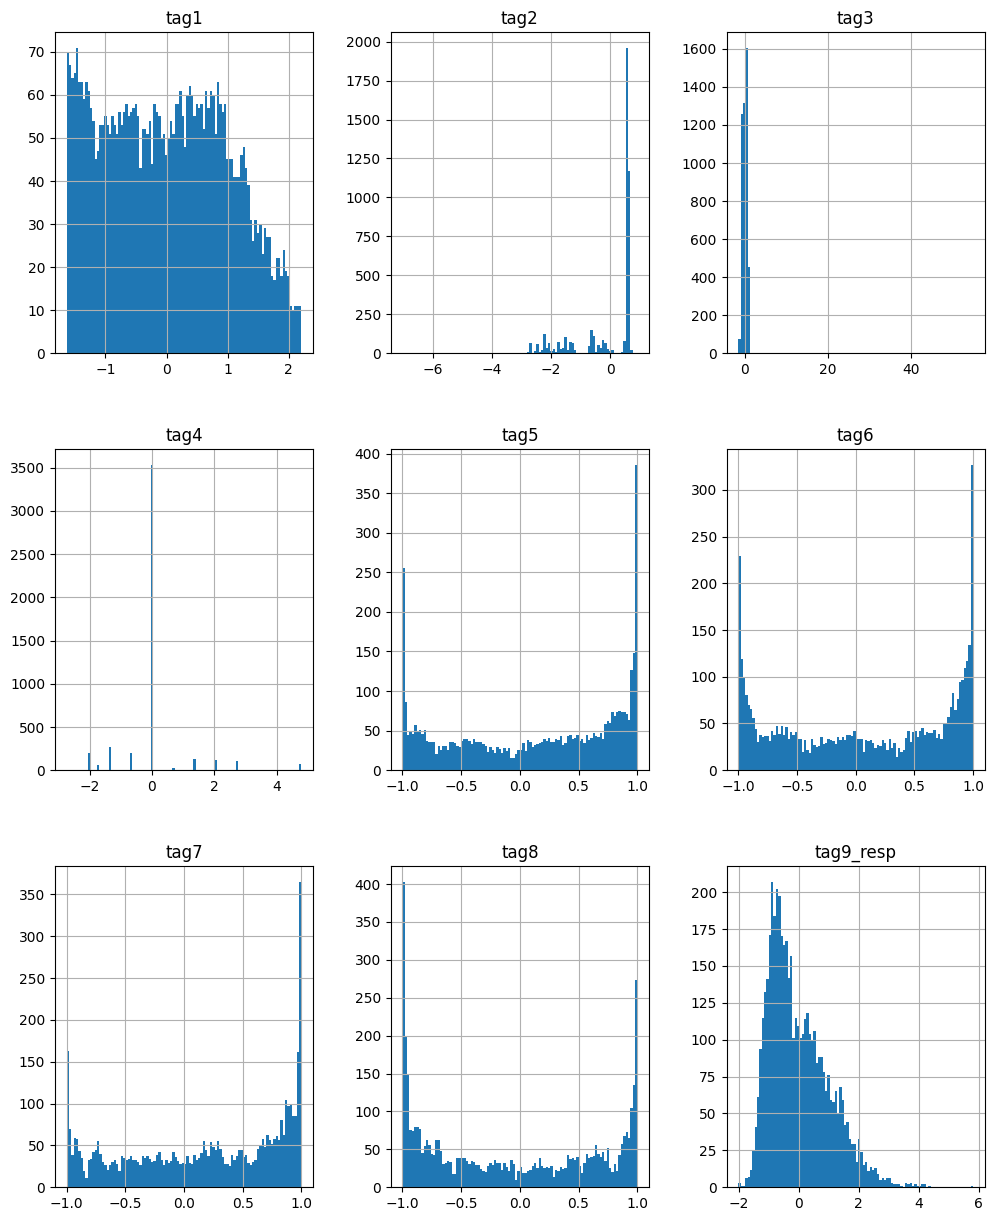

In [185]:
# #showing the histogram for all columns
df.hist(bins=100, figsize=(12,15))
plt.show()

### Data breakdown:
- **tags 1** : is amost an uniform distribution
- **tags 2-4**: we need to transform this beacuse, of probability outliers in this features
- **tags 5-8**: this data sounds like non-symmetric bimodal distribution, with two modes
- **tag response**: are right skewed negatively

## Part 2: investigating all features individually

In [186]:
def outliers(df, feature):
    Q3 = df[feature].quantile(0.75)
    Q1 = df[feature].quantile(0.25)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    outliers_sup = (df[feature] > upper_limit).sum()
    outliers_inf = (df[feature] < lower_limit).sum()

    percentage_outliers_sup = (outliers_sup / len(df[feature])) * 100
    percentage_outliers_inf = (outliers_inf / len(df[feature])) * 100

    print(f'Outliers superiors from columns {feature}: {outliers_sup} ({percentage_outliers_sup:.2f}%)')
    print(f'Outliers inferiors from columns {feature}: {outliers_inf} ({percentage_outliers_inf:.2f}%)')


In [187]:
for feature in df.columns:
    outliers(df,feature)

Outliers superiors from columns tag1: 0 (0.00%)
Outliers inferiors from columns tag1: 0 (0.00%)
Outliers superiors from columns tag2: 0 (0.00%)
Outliers inferiors from columns tag2: 429 (9.11%)
Outliers superiors from columns tag3: 4 (0.08%)
Outliers inferiors from columns tag3: 0 (0.00%)
Outliers superiors from columns tag4: 441 (9.37%)
Outliers inferiors from columns tag4: 734 (15.59%)
Outliers superiors from columns tag5: 0 (0.00%)
Outliers inferiors from columns tag5: 0 (0.00%)
Outliers superiors from columns tag6: 0 (0.00%)
Outliers inferiors from columns tag6: 0 (0.00%)
Outliers superiors from columns tag7: 0 (0.00%)
Outliers inferiors from columns tag7: 0 (0.00%)
Outliers superiors from columns tag8: 0 (0.00%)
Outliers inferiors from columns tag8: 0 (0.00%)
Outliers superiors from columns tag9_resp: 55 (1.17%)
Outliers inferiors from columns tag9_resp: 0 (0.00%)


as we can see, the most feature with outliers are tag4. So we need to start investigating it

In [188]:
df.tag4.value_counts()

tag4
-0.000204    3534
-1.369465     269
-2.054095     197
-0.684834     195
 1.369056     134
 2.053687     113
 2.738317     102
 4.792208      67
-1.711780      57
 0.684426      20
-2.738725       5
-2.305044       1
 1.137652       1
-0.260854       1
-1.963356       1
 0.449406       1
 2.559519       1
-1.990895       1
-1.652869       1
-0.684578       1
 0.580194       1
-1.511704       1
-1.756158       1
-0.778686       1
-2.189657       1
-1.010312       1
 0.354359       1
Name: count, dtype: int64

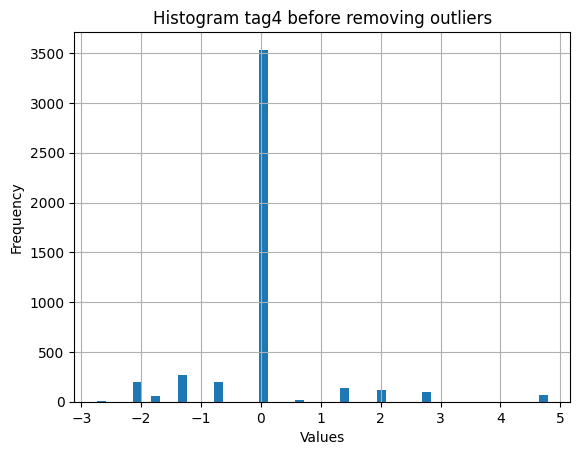

In [189]:
df.tag4.hist(bins=50)
plt.title('Histogram tag4 before removing outliers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

the tag4 feature has many high-frequency values, so we need to eliminate the low-frequency values improve our power of prediction

In [190]:
# Eliminating tag4 values with frequency less than 100 

df = df[df['tag4'].map(df['tag4'].value_counts()) > 100]
percentage_of_drop_values = (1 - len(df)/len(full_df)) * 100
print(f'with this, we eliminate {percentage_of_drop_values:.2f}% of values')


with this, we eliminate 3.50% of values


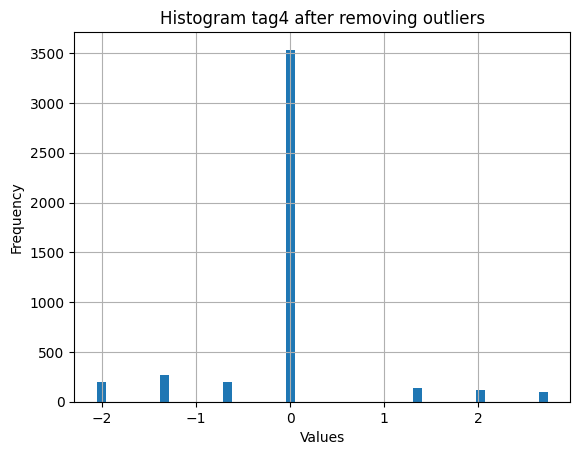

In [191]:
df.tag4.hist(bins=50)
plt.title('Histogram tag4 after removing outliers')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Lets check-out tags with outliers: tag2, tag3, tag9_resp

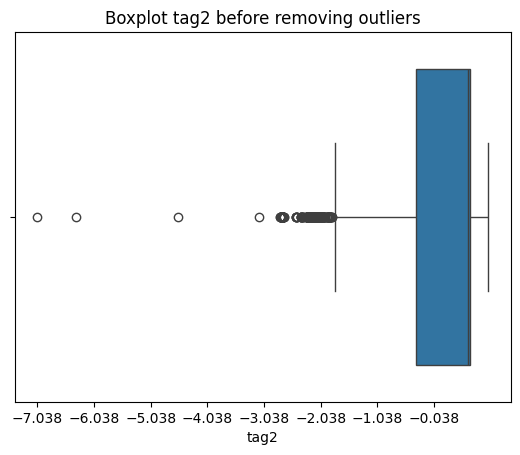

In [192]:
sns.boxplot(x=df['tag2'], orient='h')
plt.xticks(np.arange(df['tag2'].min(), df['tag2'].max()))
plt.title('Boxplot tag2 before removing outliers')
plt.show()

basing on this graph above, we will remove lowers than 3

In [193]:
df = df[df['tag2'] > -4]
percentage_of_drop_values = (1 - len(df)/len(full_df)) * 100
print(f'with this, we eliminate {percentage_of_drop_values:.2f}% of values')
outliers(df,'tag2')


with this, we eliminate 3.57% of values
Outliers superiors from columns tag2: 0 (0.00%)
Outliers inferiors from columns tag2: 384 (8.46%)


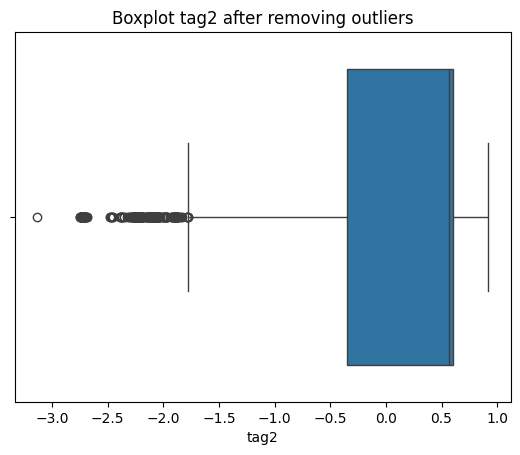

In [194]:
sns.boxplot(x=df['tag2'], orient='h')
plt.title('Boxplot tag2 after removing outliers')
plt.show()

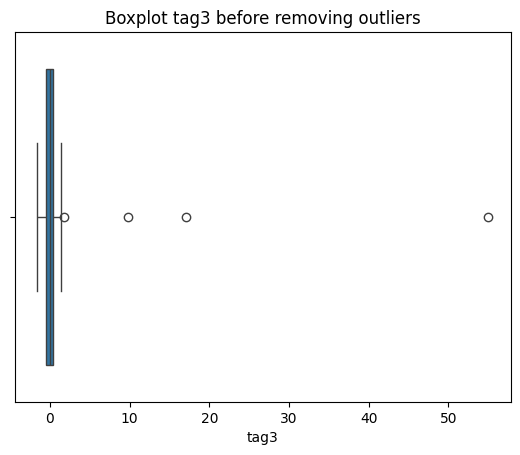

In [195]:
sns.boxplot(x=df['tag3'], orient='h')
plt.title('Boxplot tag3 before removing outliers')
plt.show()

lets remove outliers with outliers function

In [196]:
def remove_outliers(df, feature):
    Q3 = df[feature].quantile(0.75)
    Q1 = df[feature].quantile(0.25)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    old_df = df
    df = df[df[feature] < upper_limit]
    df = df[df[feature] > lower_limit]

    percentage_of_drop_values = (1 - len(df)/len(old_df)) * 100
    print(f'with this, we eliminate {percentage_of_drop_values:.2f}% of values')
    return df
    


In [197]:
df = remove_outliers(df, 'tag3')    

with this, we eliminate 0.09% of values


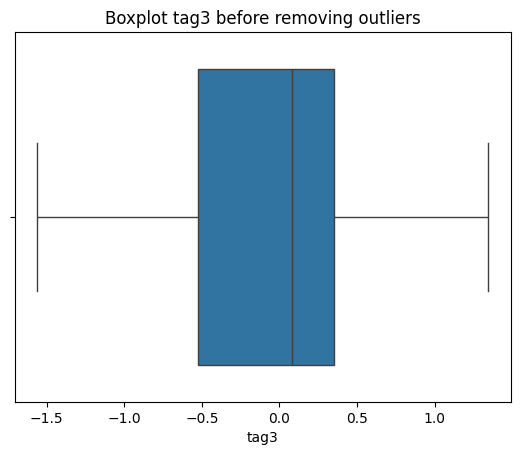

In [198]:
sns.boxplot(x=df['tag3'], orient='h')
plt.title('Boxplot tag3 before removing outliers')
plt.show()

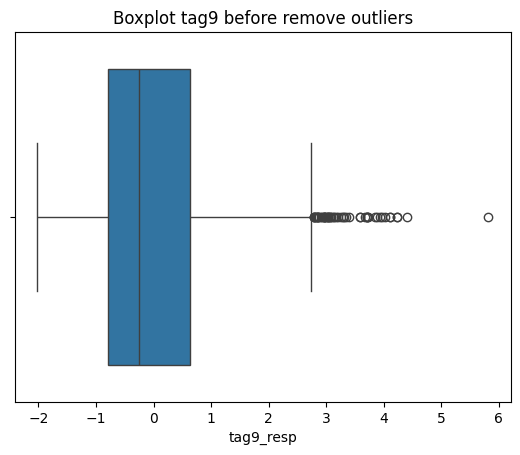

In [199]:
sns.boxplot(x=df['tag9_resp'], orient='h')
plt.title('Boxplot tag9 before remove outliers')
plt.show()

In [200]:
df = remove_outliers(df, 'tag9_resp')

with this, we eliminate 1.12% of values


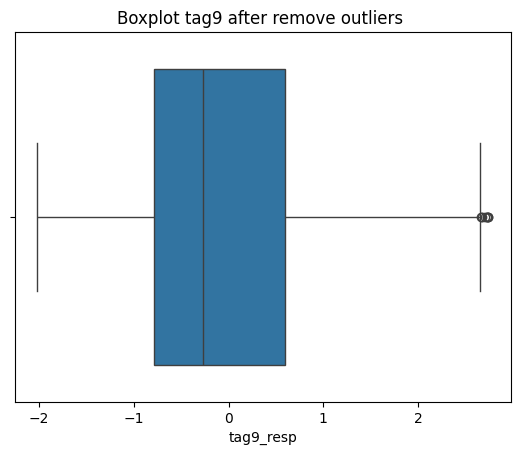

In [201]:
sns.boxplot(x=df['tag9_resp'], orient='h')
plt.title('Boxplot tag9 after remove outliers ')
plt.show()

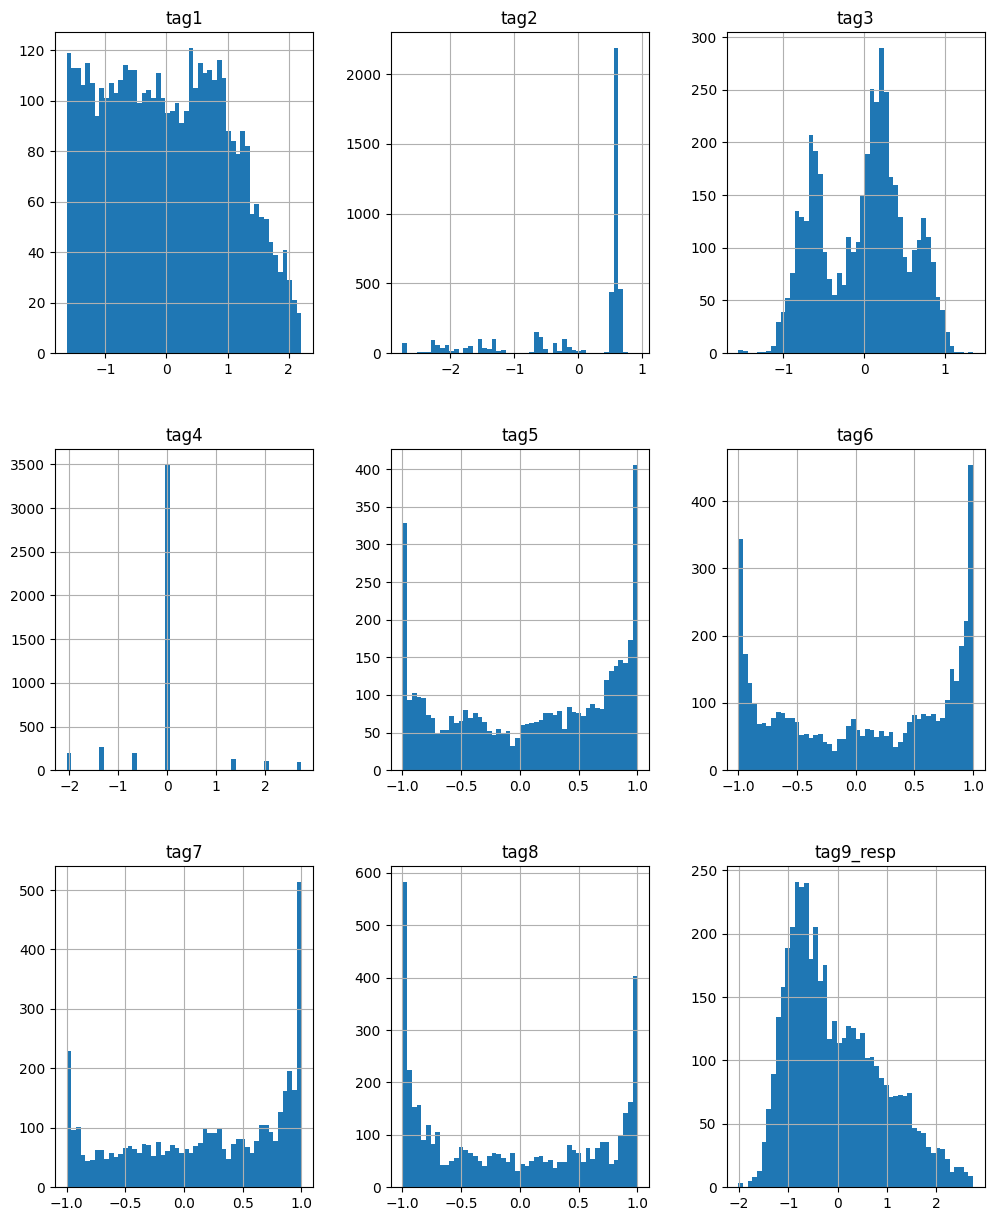

In [202]:
# #showing the histogram for all columns
df.hist(bins=50, figsize=(12,15))
plt.show()

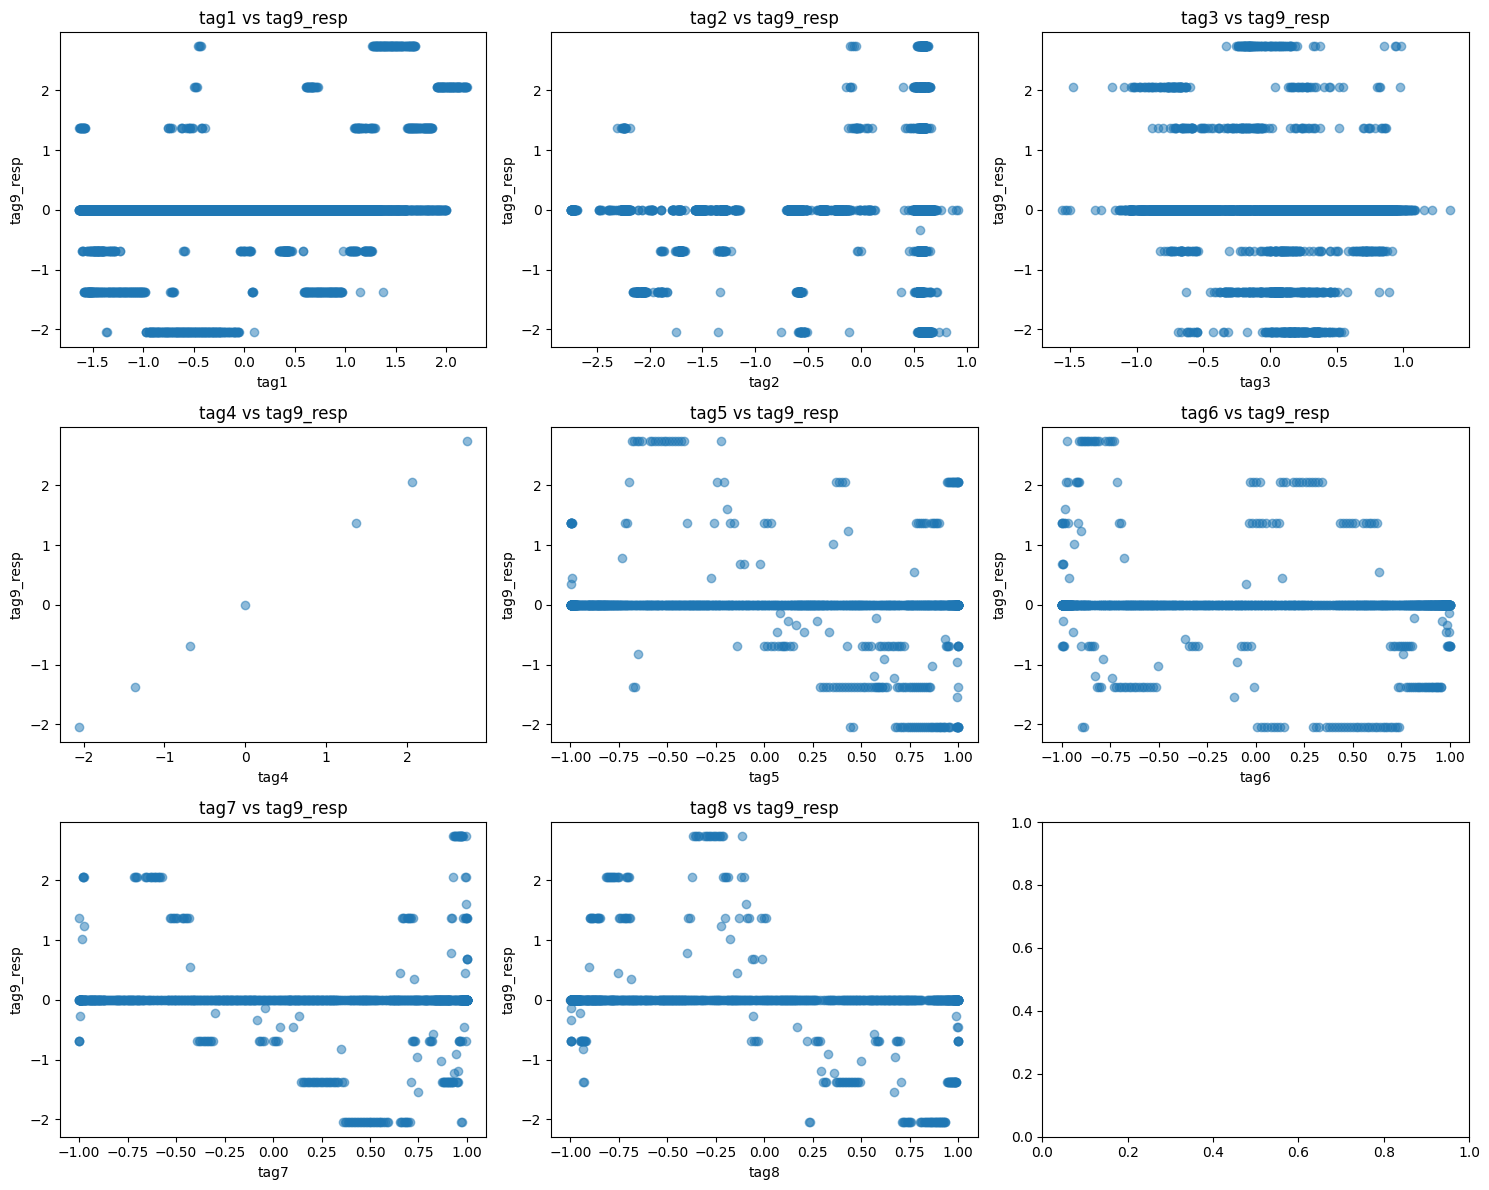

In [203]:
feature_columns = df.columns

# Set up the subplot grid
num_plots = len(feature_columns)
num_cols = 3  # You can adjust the number of columns based on your preference
num_rows = (num_plots - 1) // num_cols + 1

# Create a new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each feature and create scatter plots
for i, feature in enumerate(feature_columns):
    if feature != 'tag9_resp':
        axes[i].scatter(df[feature], df['tag9_resp'], alpha=0.5)
        axes[i].set_title(f'{feature} vs tag9_resp')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('tag9_resp')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [204]:
from scipy import stats



In [205]:
#Pearsom correlation 

df.corr().style.background_gradient(axis=None)

,tag1,tag2,tag3,tag4,tag5,tag6,tag7,tag8,tag9_resp
tag1,1.000000,0.671258,-0.384856,0.369823,0.065111,0.094950,-0.087477,-0.045025,0.699593
tag2,0.671258,1.000000,-0.150358,0.129093,-0.005743,0.013229,-0.099334,-0.201055,0.445428
tag3,-0.384856,-0.150358,1.000000,-0.129996,-0.028305,-0.179298,0.155441,-0.125416,-0.047713
tag4,0.369823,0.129093,-0.129996,1.000000,-0.224198,-0.187128,-0.107449,-0.350923,0.251906
tag5,0.065111,-0.005743,-0.028305,-0.224198,1.000000,0.066629,-0.089939,0.180040,0.014270
tag6,0.094950,0.013229,-0.179298,-0.187128,0.066629,1.000000,-0.218569,-0.101125,0.010082
tag7,-0.087477,-0.099334,0.155441,-0.107449,-0.089939,-0.218569,1.000000,0.134273,-0.062475
tag8,-0.045025,-0.201055,-0.125416,-0.350923,0.180040,-0.101125,0.134273,1.000000,-0.029908
tag9_resp,0.699593,0.445428,-0.047713,0.251906,0.014270,0.010082,-0.062475,-0.029908,1.000000


In [206]:
X = df.drop('tag9_resp', axis = 1)
y = df.tag9_resp
pd.DataFrame(
    [stats.pearsonr(X[col], y) for col in X.columns],
    columns=["Corr. Pearson", "p-value"],
    index=X.columns
).round(4)

,Corr. Pearson,p-value
tag1,0.6996,0.0000
tag2,0.4454,0.0000
tag3,-0.0477,0.0014
tag4,0.2519,0.0000
tag5,0.0143,0.3393
tag6,0.0101,0.4996
tag7,-0.0625,0.0000
tag8,-0.0299,0.0452


## Part 3: training and choosing the best model for predictions

In [207]:
# # from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers
# import tensorflow as tf



In [208]:
# scaler = MinMaxScaler()


In [209]:
X = df.drop('tag9_resp', axis=1)
y = df['tag9_resp']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)


# X_train_normal = scaler.fit_transform(X_train)
# X_test_normal = scaler.transform(X_test)

In [211]:
tf.random.set_seed(42)

model = Sequential([
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100),
    layers.Dense(1),
])
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
    metrics=['mse']
)

In [212]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


29/29 [==============================] - 2s 3ms/step - loss: 0.4500 - mse: 0.4500
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.3085 - mse: 0.3085
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.3786 - mse: 0.3786
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2740 - mse: 0.2740
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2599 - mse: 0.2599
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2594 - mse: 0.2594
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.3015 - mse: 0.3015
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2863 - mse: 0.2863
Epoch 9/100
29/29 [==============================] - 0s 3ms/step - loss: 0.2348 - mse: 0.2348
Epoch 10/100
29/29 [==============================] - 0s 5ms/step - loss: 0.2291 - mse: 0.2291
Epoch 11/100
29/29 [==============================] - 0s 5ms/step - los

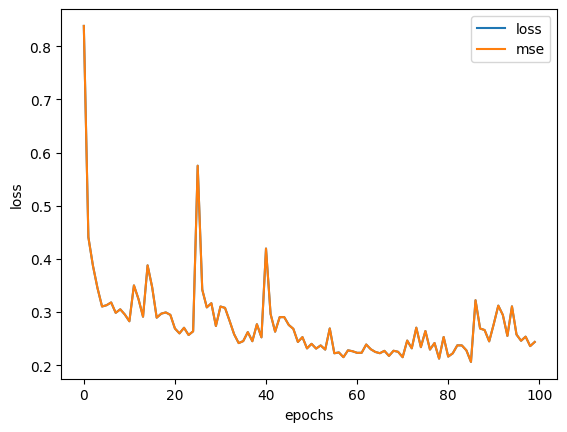

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

113/113 [==============================] - 0s 2ms/step


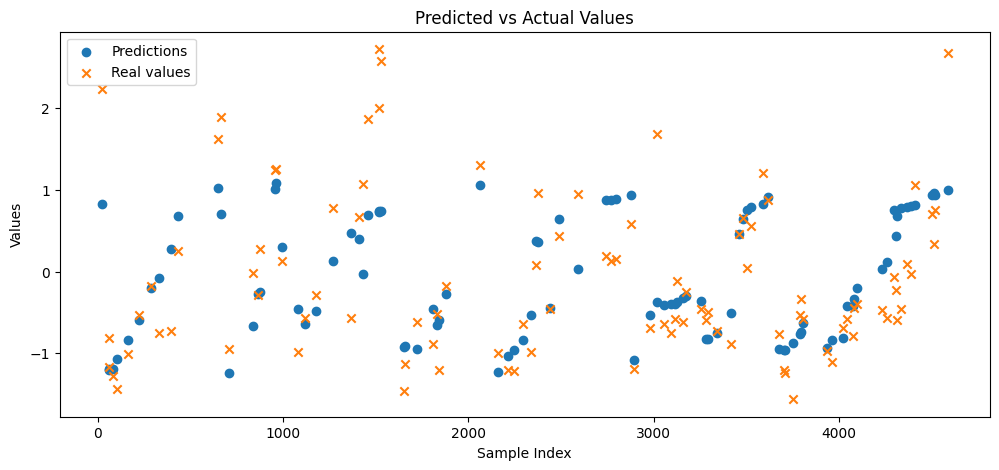

In [ ]:
y_predict = model.predict(X_test)
df = pd.DataFrame({'Predicted': y_predict.squeeze(), 'Actual': y_test})
sample = df.sample(100)
plt.figure(figsize=(12, 5))
plt.scatter(sample.index, sample['Predicted'], marker='o', label='Predictions')
plt.scatter(sample.index, sample['Actual'], marker='x', label='Real values')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [ ]:
model.evaluate(X_test_normal,y_test)

113/113 [==============================] - 0s 2ms/step - loss: 0.2845 - mse: 0.2845


[0.2844845950603485, 0.2844845950603485]

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               900       
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21201 (82.82 KB)
Trainable params: 21201 (82.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
